In [1]:
#import data handling libraries
import pandas as pd
import numpy as np
import json

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import uniform, loguniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

import modeller

# Automatically reload all modules
%load_ext autoreload
%autoreload 2  

#load the dictionaries
with open ('../Data/Dictionaries/crse_dict.json') as f:
    crse_dict = json.load(f)
with open ('../Data/Dictionaries/math_dict.json') as f:
    math_dict = json.load(f)
with open ('../Data/Dictionaries/gen_dict.json') as f:
    gen_dict = json.load(f)

#make the course lists
courses = list(crse_dict.keys())
math_courses = list(math_dict.keys())
gen_courses = list(gen_dict.keys())

#read in the main dataset
df = pd.read_csv('../Data/Datasets/dataset_engineered.csv')

df

,STUDENT,ENT_SEM,GRAD_SEM,165,166,265,143,140,104,150,...,SEM_8.0_GEN_cdf,SEM_8.5_GEN_cdf,SEM_9.0_GEN_cdf,SEM_9.5_GEN_cdf,SLOPE,INT,SLOPE_MATH,INT_MATH,SLOPE_GEN,INT_GEN
0,0,20.6,9.5,0.0,0.0,-3.5,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1.368421e-01,5.444869e-17,0.0,0.0,-1.368421e-01,5.444869e-17
1,3,20.4,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,-2.363863e-17,1.000000e+00,0.0,0.0,-2.363863e-17,1.000000e+00
2,4,19.6,9.5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,2.701754e-01,1.017544e+00,0.0,0.0,2.701754e-01,1.017544e+00
3,5,20.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1,1,1,1,8.421053e-02,4.210526e-01,0.0,0.0,8.421053e-02,4.210526e-01
4,7,19.6,8.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,1,1,1,1,1.543860e-01,-1.929825e-01,0.0,0.0,1.543860e-01,-1.929825e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,13059,20.6,4.5,0.0,0.0,0.0,0.0,3.5,0.0,1.0,...,2,2,2,2,1.684211e-01,7.894737e-01,0.0,0.0,1.684211e-01,7.894737e-01
9177,13060,14.6,12.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.5,...,-2,-2,-2,-2,-1.368421e-01,-1.052632e+00,0.0,0.0,-1.368421e-01,-1.052632e+00
9178,13061,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1,1,1,1,8.421053e-02,4.210526e-01,0.0,0.0,8.421053e-02,4.210526e-01
9179,13062,13.6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.5,...,-1,-1,-1,-1,-1.543860e-01,1.929825e-01,0.0,0.0,-1.543860e-01,1.929825e-01


In [2]:
df.columns

Index(['STUDENT', 'ENT_SEM', 'GRAD_SEM', '165', '166', '265', '143', '140',
       '104', '150', '207', '201', '317', '267', '105', '301', '266', '414',
       '160', '101', '25', '492', '341', '385', '435', '397', '436', '495',
       '314', '500', '304', 'Y', 'TM', 'SEM_0.5_cdf', 'SEM_1.0_cdf',
       'SEM_1.5_cdf', 'SEM_2.0_cdf', 'SEM_2.5_cdf', 'SEM_3.0_cdf',
       'SEM_3.5_cdf', 'SEM_4.0_cdf', 'SEM_4.5_cdf', 'SEM_5.0_cdf',
       'SEM_5.5_cdf', 'SEM_6.0_cdf', 'SEM_6.5_cdf', 'SEM_7.0_cdf',
       'SEM_7.5_cdf', 'SEM_8.0_cdf', 'SEM_8.5_cdf', 'SEM_9.0_cdf',
       'SEM_9.5_cdf', 'SEM_0.5_MATH_cdf', 'SEM_1.0_MATH_cdf',
       'SEM_1.5_MATH_cdf', 'SEM_2.0_MATH_cdf', 'SEM_2.5_MATH_cdf',
       'SEM_3.0_MATH_cdf', 'SEM_3.5_MATH_cdf', 'SEM_4.0_MATH_cdf',
       'SEM_4.5_MATH_cdf', 'SEM_5.0_MATH_cdf', 'SEM_5.5_MATH_cdf',
       'SEM_6.0_MATH_cdf', 'SEM_6.5_MATH_cdf', 'SEM_7.0_MATH_cdf',
       'SEM_7.5_MATH_cdf', 'SEM_8.0_MATH_cdf', 'SEM_8.5_MATH_cdf',
       'SEM_9.0_MATH_cdf', 'SEM_9.5_M

In [3]:
courses = ['165', '166', '265', '143', '140',
       '104', '150', '207', '201', '317', '267', '105', '301', '266', '414',
       '160', '101', '25', '492', '341', '385', '435', '397', '436', '495',
       '314', '500', '304']
SEMs = ['ENT_SEM', 'SEM_0.5_cdf', 'SEM_1.0_cdf',
       'SEM_1.5_cdf', 'SEM_2.0_cdf', 'SEM_2.5_cdf', 'SEM_3.0_cdf',
       'SEM_3.5_cdf', 'SEM_4.0_cdf', 'SEM_4.5_cdf', 'SEM_5.0_cdf',
       'SEM_5.5_cdf', 'SEM_6.0_cdf', 'SEM_6.5_cdf', 'SEM_7.0_cdf',
       'SEM_7.5_cdf', 'SEM_8.0_cdf', 'SEM_8.5_cdf', 'SEM_9.0_cdf',
       'SEM_9.5_cdf', 'SEM_0.5_MATH_cdf', 'SEM_1.0_MATH_cdf',
       'SEM_1.5_MATH_cdf', 'SEM_2.0_MATH_cdf', 'SEM_2.5_MATH_cdf',
       'SEM_3.0_MATH_cdf', 'SEM_3.5_MATH_cdf', 'SEM_4.0_MATH_cdf',
       'SEM_4.5_MATH_cdf', 'SEM_5.0_MATH_cdf', 'SEM_5.5_MATH_cdf',
       'SEM_6.0_MATH_cdf', 'SEM_6.5_MATH_cdf', 'SEM_7.0_MATH_cdf',
       'SEM_7.5_MATH_cdf', 'SEM_8.0_MATH_cdf', 'SEM_8.5_MATH_cdf',
       'SEM_9.0_MATH_cdf', 'SEM_9.5_MATH_cdf']
conts = ['SLOPE', 'INT', 'SLOPE_MATH', 'INT_MATH', 'SLOPE_GEN', 'INT_GEN']
full_features = conts + courses + SEMs + ['TM']

print('Number of features:', len(full_features))

print('Overall grad rate:', df['Y'].mean())

random_states = [5917, 656, 4125, 2797, 9936]
print('Random states:', random_states)

Number of features: 74
Overall grad rate: 0.4897070035943797
Random states: [5917, 656, 4125, 2797, 9936]


In [4]:
splits = modeller.get_splits(data=df,
                    features = full_features,
                    random_states = random_states,
                    strat_variable='TM')

Split 0 best CV accuracy: 0.6615, Test accuracy: 0.6543
Split 1 best CV accuracy: 0.6623, Test accuracy: 0.6625
Split 2 best CV accuracy: 0.6688, Test accuracy: 0.6570
Split 3 best CV accuracy: 0.6686, Test accuracy: 0.6440
Split 4 best CV accuracy: 0.6637, Test accuracy: 0.6603


/Users/arvindsuresh/Documents/GitHub/Fall-2024-Student-Success-Prediction/Modelling/modeller.py:199: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  #each row of fimp_df contains the normalized feature importances for the corresponding model. For each feature, we take the mean of the normalized feature importances across all models.


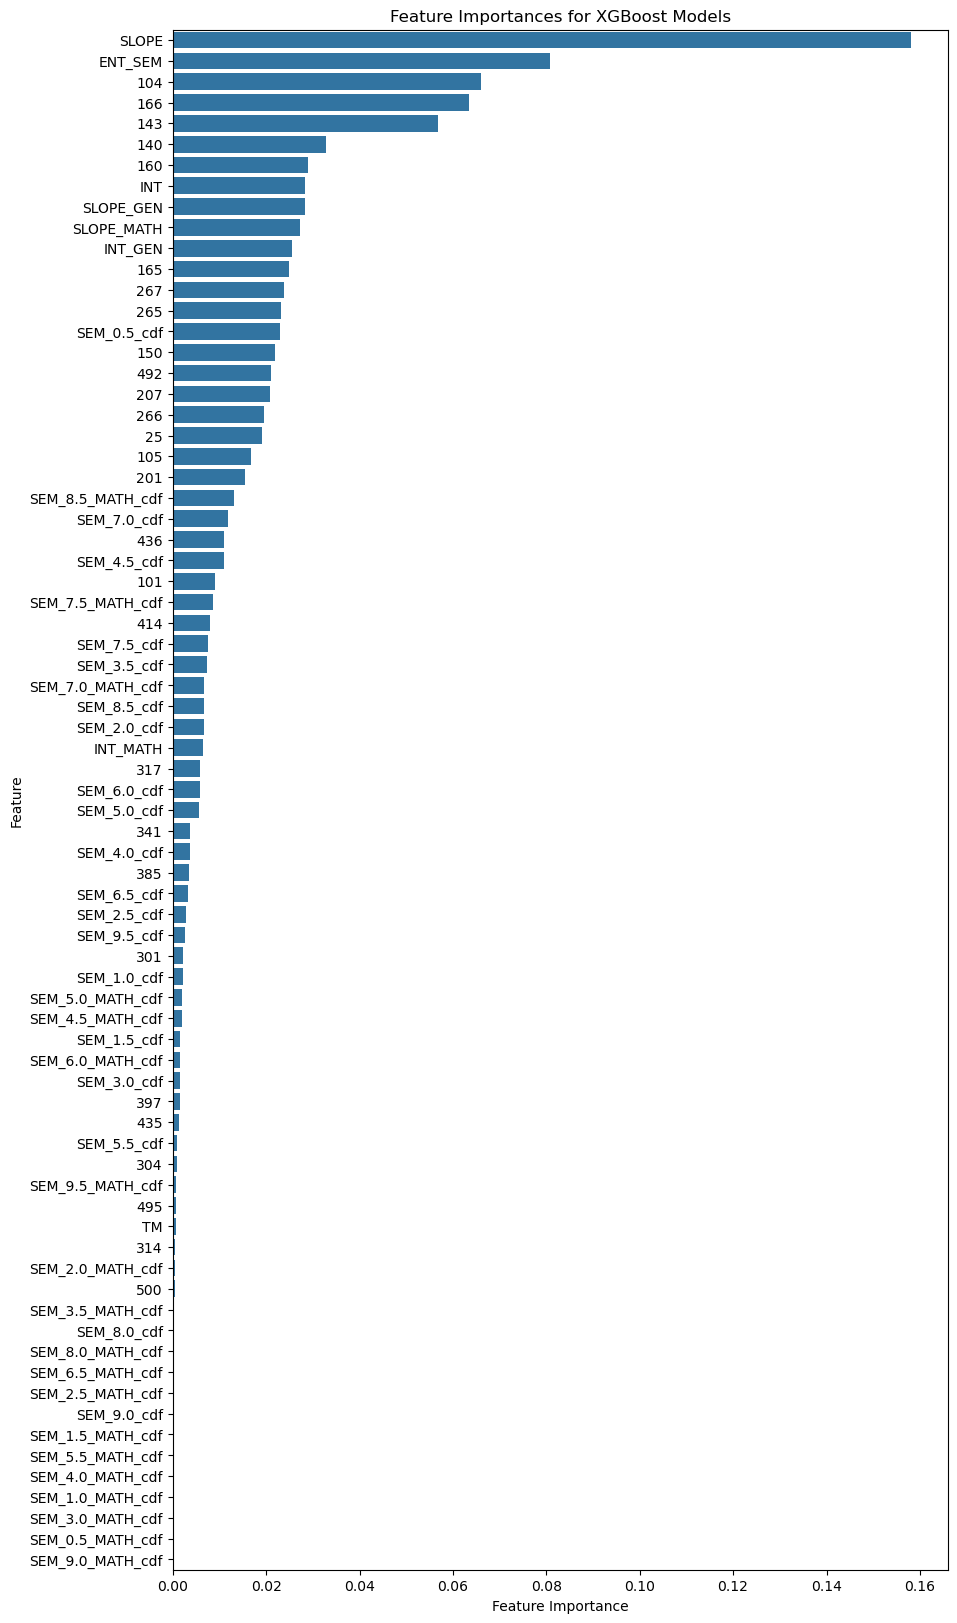

In [34]:
#param grid for xgboost randomized search cv
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

#get tuned xgb models along with accuracy scores and feature importances
xgb_models, xgb_df, xgb_fimp_df = modeller.xgb_cv(splits=splits,
                                                          random_states=random_states,
                                                          param_grid=xgb_param_grid)

#plot the feature importances for the xgb models
modeller.xgb_plot_fimp(fimp_df=xgb_fimp_df)

Split 0 best CV accuracy: 0.6341, Test accuracy: 0.6211
Split 1 best CV accuracy: 0.6314, Test accuracy: 0.6424
Split 2 best CV accuracy: 0.6325, Test accuracy: 0.6260
Split 3 best CV accuracy: 0.6358, Test accuracy: 0.6108
Split 4 best CV accuracy: 0.6288, Test accuracy: 0.6200


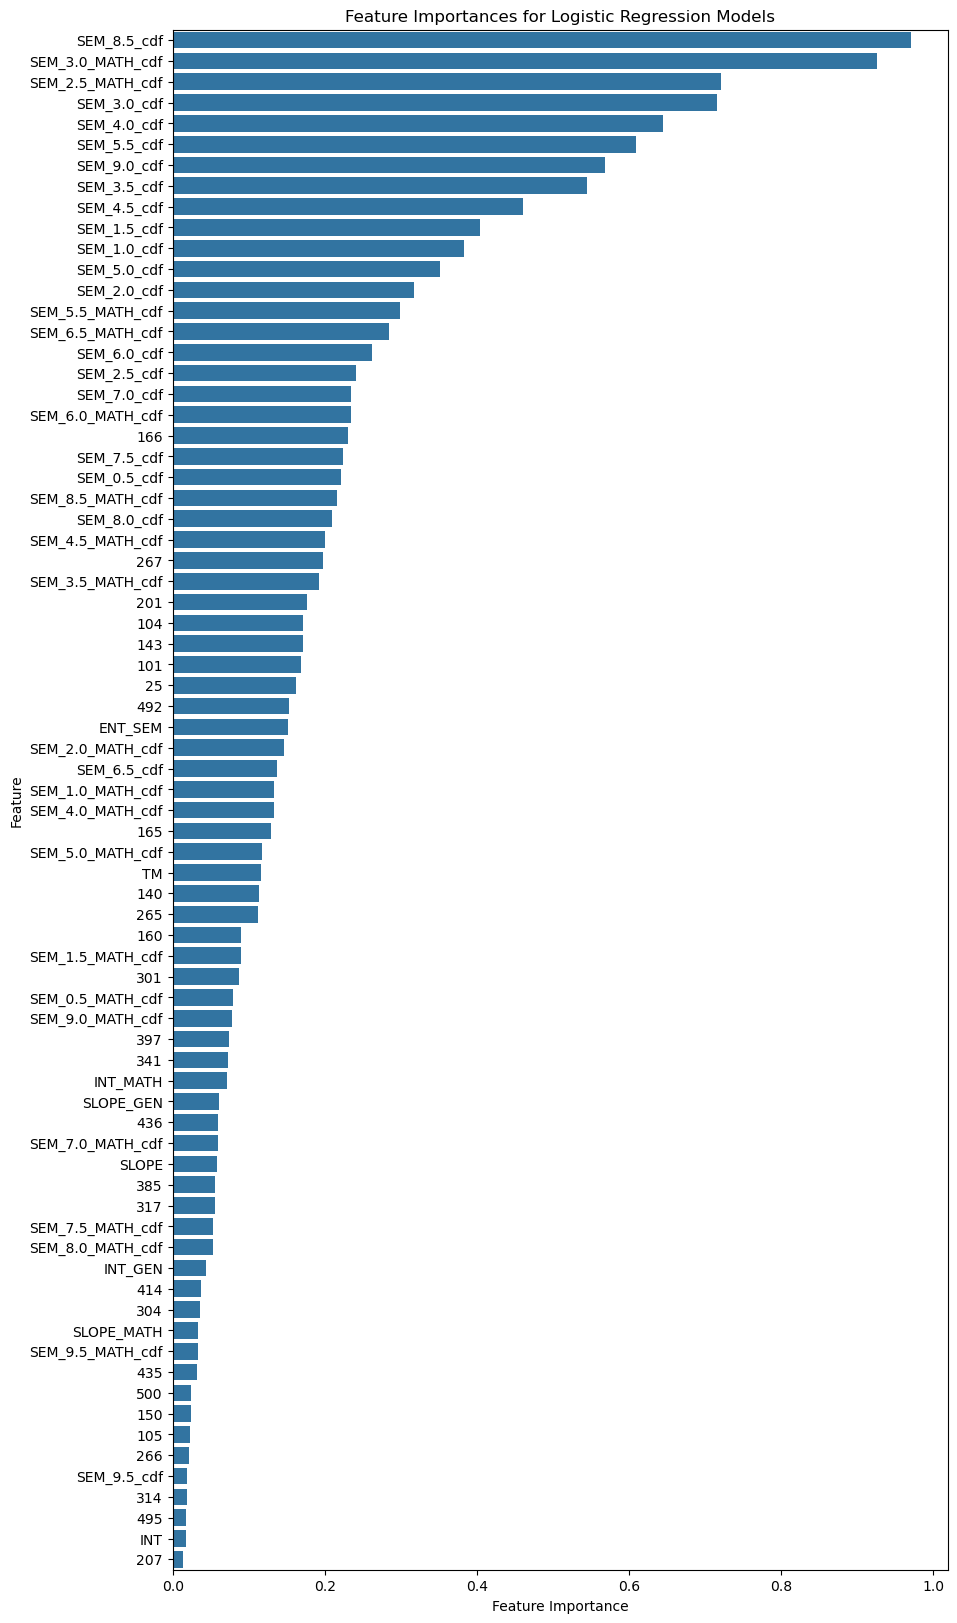

In [35]:
#param grid for logistic regression randomized search cv
logreg_param_grid = {
        'logisticregression__C': uniform(0.1, 10),
        'logisticregression__max_iter': [1000],
        'logisticregression__penalty': ['l2'],
    }

#get tuned logistic regression models along with accuracy scores and feature importances
logreg_models, logreg_df, logreg_fimp_df = modeller.logreg_cv(splits=splits,
                                                              random_states=random_states,
                                                              param_grid=logreg_param_grid)

#plot the feature importances for the logistic regression models
modeller.logreg_plot_fimp(fimp_df=logreg_fimp_df)

In [33]:
#carry out cv for svc_rbf models
svc_models, svc_df = modeller.svc_rbf_cv(splits=splits,
                                                  random_states=random_states)

Split 0 best CV accuracy: 0.6482, Test accuracy: 0.6407
Split 1 best CV accuracy: 0.6516, Test accuracy: 0.6451
Split 2 best CV accuracy: 0.6472, Test accuracy: 0.6565
Split 3 best CV accuracy: 0.6556, Test accuracy: 0.6238
Split 4 best CV accuracy: 0.6458, Test accuracy: 0.6549


In [61]:
#from the fimp dataframes, get the top 40 features after taking the mean of the feature importances
xgb_features = modeller.get_top_features(fimp_df=xgb_fimp_df, n=40)
logreg_features = modeller.get_top_features(fimp_df=logreg_fimp_df, n=25)
svc_features = list(set(xgb_features + logreg_features))

In [62]:
custom_results = modeller.customized_binary_classifier(splits=splits,
                                                logreg_models=logreg_models,
                                                xgb_models=xgb_models,
                                                xgb_features=xgb_features,
                                                logreg_features=logreg_features,
                                                svc_features=svc_features)

Split 1 accuracies for custom model:
Train: 0.7117   Test: 0.6516
Split 2 accuracies for custom model:
Train: 0.706   Test: 0.6538
Split 3 accuracies for custom model:
Train: 0.7225   Test: 0.6473
Split 4 accuracies for custom model:
Train: 0.7293   Test: 0.626
Split 5 accuracies for custom model:
Train: 0.7082   Test: 0.6473
